In [1]:
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
import numpy as np
import jieba

In [2]:
KoreaDrama = pd.read_csv("KoreaDrama_re.csv",encoding='utf-8')
KoreaDrama

,Unnamed: 0,標題,時間,內容
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ..."
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=..."
...,...,...,...,...
257,270,[新聞]《男朋友》連續兩日登收視冠軍，朴寶劍「,20181201,"<span class=""f3 b1 hl"">《男朋友》連續兩日登收視冠軍，朴寶劍「年下男」..."
258,271,[新聞] Priest 將進行催眠驅魔 劇情再度反轉,20181201,Priest 將在無意識狀態下進行催眠驅魔…劇情再度反轉\r\n\r\n本劇〈Priest〉...
259,272,[情報] 李宥英、金玟廷有望與SJ始源合作！擔任KB,20181201,"<span class=""f3 b1 hl"">李宥英、金玟廷有望與SJ始源合作！擔任KBS新..."
260,273,[心得] MBC 赤月青日 EP.5~EP.8 (雷),20181201,"(從第6集開始有點驚悚的感覺了...)\r\n\r\n\r\n\r\n\r\n\r\n""有詩..."


In [3]:
jieba.set_dictionary('dict.txt.big')   #匯入字典，目的是為了後來斷詞用的(用來區分各個單詞)

In [4]:
removeword = ['span','class','f3','https','imgur','h1','_   blank','href','rel',
              'nofollow','target','cdn','cgi','b4','jpg','hl','b1','f5','f4',
              'goo.gl','f2','email','map','f1','f6','__cf___','data','bbs'
              'html','cf','f0','b2','b3','b5','b6','原文內容','原文連結','作者'
              '標題','時間','看板','<','>','，','。','？','—','閒聊','・','/',
              ' ','=','\"','\n','」','「','！','[',']','：','‧','╦','╔','╗','║'
              ,'╠','╬','╬',':','╰','╩','╯','╭','╮','│','╪','─','《','》','_'
              ,'.','、','（','）','　','*','※','~','○','”','“','～','@','＋',]

#設定所欲關注的戲劇名稱
movie = ['成為王的男人','皇后的品格','赤月青日','神的測驗',
        '死之詠讚','王牌大律師','Priest驅魔者','加油吧威基基',
        '皮諾丘','魔女寶鑑','好運羅曼史','購物王路易','七次初吻',
        '男朋友','請回答1997','來自星星的你']


In [5]:
# 將所關注的戲劇名稱加入jieba字典中
for each_name in movie:
    jieba.add_word(each_name)

# 豆瓣上面的評分
bean = [7.6, 6.8, 8.4, 7.9, 8.6, 9.4, 6.1, 8.3, 5.9, 6.7, 7.4, 6.1, 6.8, 7.0, 8.9, 8.5]
score_avg = np.mean(bean)

Building prefix dict from c:\Users\yifun\Desktop\python\dict.txt.big ...
Dumping model to file cache C:\Users\yifun\AppData\Local\Temp\jieba.u8a72d4885729f93584b4c21fa5034d2b.cache
Loading model cost 1.430 seconds.
Prefix dict has been built successfully.


7.5249999999999995


In [8]:
import matplotlib.pyplot as plt
%matplotlib.inline

KoreaDrama['標題與內容'] = KoreaDrama['標題'] + KoreaDrama['內容']

for word in removeword:
    KoreaDrama['標題與內容'] = KoreaDrama['標題與內容'].str.replace(word,'')

UsageError: Line magic function `%matplotlib.inline` not found.


In [8]:
KoreaDrama

,Unnamed: 0,標題,時間,內容,標題與內容
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ...",LIVE2018SBS演技大賞2018SBS演技大賞\r日期20181231\r時間2055...
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...,LIVE2018KBS演技大賞2018KBS演技大賞\r\r直播201812311955\r...
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...,心得值得一看的就算死也喜歡(雷)繼金科長後終於又看到一部讓人忍不住一集接著一集看下去的戲說這...
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,ReLIVEtvN阿爾罕布拉宮的回憶EP10以下皆爆雷請慎入\r\r\r\r\r\r\r\r...
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=...",心得金材昱徐睿知另有他路(雷)aicomZFcWKLLblankicomZFcWKLLa\r...
...,...,...,...,...,...
257,270,[新聞]《男朋友》連續兩日登收視冠軍，朴寶劍「,20181201,"<span class=""f3 b1 hl"">《男朋友》連續兩日登收視冠軍，朴寶劍「年下男」...",新聞男朋友連續兩日登收視冠軍朴寶劍男朋友連續兩日登收視冠軍朴寶劍年下男魅力迷倒觀眾\r原文網...
258,271,[新聞] Priest 將進行催眠驅魔 劇情再度反轉,20181201,Priest 將在無意識狀態下進行催眠驅魔…劇情再度反轉\r\n\r\n本劇〈Priest〉...,新聞Priest將進行催眠驅魔劇情再度反轉Priest將在無意識狀態下進行催眠驅魔…劇情再度...
259,272,[情報] 李宥英、金玟廷有望與SJ始源合作！擔任KB,20181201,"<span class=""f3 b1 hl"">李宥英、金玟廷有望與SJ始源合作！擔任KBS新...",情報李宥英金玟廷有望與SJ始源合作擔任KB李宥英金玟廷有望與SJ始源合作擔任KBS新劇各位國...
260,273,[心得] MBC 赤月青日 EP.5~EP.8 (雷),20181201,"(從第6集開始有點驚悚的感覺了...)\r\n\r\n\r\n\r\n\r\n\r\n""有詩...",心得MBC赤月青日EP5EP8(雷)(從第6集開始有點驚悚的感覺了)\r\r\r\r\r\r...


In [9]:
theSTR = KoreaDrama['標題與內容'].tolist() #將欄位內容轉換為List型態的資料

theSTR

['LIVE2018SBS演技大賞2018SBS演技大賞\r日期20181231\r時間2055\r主持人申東燁申惠善李帝勳\r網頁a5izEtoblank5izEtoa\r\r(感謝watase124提供)\r\r\r\r直播資訊\r＊ahttpenjoybscomlivechannelSBSblankhttpenjoybscomlivechannelSBSa\r點Moredetail',
 'LIVE2018KBS演技大賞2018KBS演技大賞\r\r直播201812311955\r\r直播網址1ahttpenjoybscomlivechannelKBS2blankhttpenjoybscomlivechannelKBS2a\rMoredetail→Playcontent\r直播網址2ayoutubeJNWDvosPBWYblankyoutubeJNWDvosPBWYa\r\r主持人全炫茂Uie\r\r現在正在快速撥出紅毯畫面中\r\r\r一部得獎名單\r\r男子青少年演技獎南多凜RadioRomance\r女子青少年演技獎金煥熙我們遇見的奇蹟\r\r男子新人獎朴成勳我唯一的守護者\r男子新人獎金權一起生活吧\r女子新人獎朴世婉一起生活吧\r女子新人獎薛仁雅明日也晴朗\r\r男子配角獎金元海今天的偵探你也是人類嗎\r男子配角獎印喬鎮就算死也喜歡\r女子配角獎金賢淑推理的女王2你也是人類嗎\r女子配角獎尹真伊我唯一的守護者\r\r男子聯作獨幕劇獎張東尹國標舞女孩\r男子聯作獨幕劇獎尹博金槍魚與海豚\r女子聯作獨幕劇獎李一花媽媽的第三次婚姻\r女子聯作獨幕劇獎李雪玉蘭麵屋\r\r男子優秀獎日日劇部門姜恩卓愛到最後\r男子優秀獎日日劇部門朴胤載讓開命運啊\r女子優秀獎日日劇部門夏希羅車達萊夫人的愛情\r女子優秀獎日日劇部門朴荷娜人偶之家\r\r男子優秀獎長篇電視劇部門李尚禹一起生活吧\r男子優秀獎長篇電視劇部門李章宇我唯一的守護者\r女子優秀獎長篇電視劇部門韓智慧一起生活吧\r女子優秀獎長篇電視劇部門Uie我唯一的守護者\r\r網路票選人氣賞金明民我們遇見的奇蹟\r網路票選人氣賞朴炯植金牌律師\r\r\r\r二部得獎名單\r\r作家賞金思京我唯一的守護者\r\r最佳CP獎徐康俊孔昇延你也是人類嗎\r最佳CP獎崔丹尼爾白珍熙Jugglers\r最佳CP獎金明民羅美蘭我們

In [10]:
theSTR = ''.join(theSTR) #將上述List資料以指定的內容(即空白)連接後新字串型態資料

theSTR

"LIVE2018SBS演技大賞2018SBS演技大賞\r日期20181231\r時間2055\r主持人申東燁申惠善李帝勳\r網頁a5izEtoblank5izEtoa\r\r(感謝watase124提供)\r\r\r\r直播資訊\r＊ahttpenjoybscomlivechannelSBSblankhttpenjoybscomlivechannelSBSa\r點MoredetailLIVE2018KBS演技大賞2018KBS演技大賞\r\r直播201812311955\r\r直播網址1ahttpenjoybscomlivechannelKBS2blankhttpenjoybscomlivechannelKBS2a\rMoredetail→Playcontent\r直播網址2ayoutubeJNWDvosPBWYblankyoutubeJNWDvosPBWYa\r\r主持人全炫茂Uie\r\r現在正在快速撥出紅毯畫面中\r\r\r一部得獎名單\r\r男子青少年演技獎南多凜RadioRomance\r女子青少年演技獎金煥熙我們遇見的奇蹟\r\r男子新人獎朴成勳我唯一的守護者\r男子新人獎金權一起生活吧\r女子新人獎朴世婉一起生活吧\r女子新人獎薛仁雅明日也晴朗\r\r男子配角獎金元海今天的偵探你也是人類嗎\r男子配角獎印喬鎮就算死也喜歡\r女子配角獎金賢淑推理的女王2你也是人類嗎\r女子配角獎尹真伊我唯一的守護者\r\r男子聯作獨幕劇獎張東尹國標舞女孩\r男子聯作獨幕劇獎尹博金槍魚與海豚\r女子聯作獨幕劇獎李一花媽媽的第三次婚姻\r女子聯作獨幕劇獎李雪玉蘭麵屋\r\r男子優秀獎日日劇部門姜恩卓愛到最後\r男子優秀獎日日劇部門朴胤載讓開命運啊\r女子優秀獎日日劇部門夏希羅車達萊夫人的愛情\r女子優秀獎日日劇部門朴荷娜人偶之家\r\r男子優秀獎長篇電視劇部門李尚禹一起生活吧\r男子優秀獎長篇電視劇部門李章宇我唯一的守護者\r女子優秀獎長篇電視劇部門韓智慧一起生活吧\r女子優秀獎長篇電視劇部門Uie我唯一的守護者\r\r網路票選人氣賞金明民我們遇見的奇蹟\r網路票選人氣賞朴炯植金牌律師\r\r\r\r二部得獎名單\r\r作家賞金思京我唯一的守護者\r\r最佳CP獎徐康俊孔昇延你也是人類嗎\r最佳CP獎崔丹尼爾白珍熙Jugglers\r最佳CP獎金明民羅美蘭我們遇見的奇蹟\

In [11]:
words = list(jieba.cut(theSTR)) #透過結巴來斷詞
words

['LIVE2018SBS',
 '演技',
 '大賞',
 '2018SBS',
 '演技',
 '大賞',
 '\r',
 '日期',
 '20181231',
 '\r',
 '時間',
 '2055',
 '\r',
 '主持人',
 '申東燁',
 '申惠善',
 '李帝勳',
 '\r',
 '網頁',
 'a5izEtoblank5izEtoa',
 '\r',
 '\r',
 '(',
 '感謝',
 'watase124',
 '提供',
 ')',
 '\r',
 '\r',
 '\r',
 '\r',
 '直播',
 '資訊',
 '\r',
 '＊',
 'ahttpenjoybscomlivechannelSBSblankhttpenjoybscomlivechannelSBSa',
 '\r',
 '點',
 'MoredetailLIVE2018KBS',
 '演技',
 '大賞',
 '2018KBS',
 '演技',
 '大賞',
 '\r',
 '\r',
 '直播',
 '201812311955',
 '\r',
 '\r',
 '直播',
 '網址',
 '1ahttpenjoybscomlivechannelKBS2blankhttpenjoybscomlivechannelKBS2a',
 '\r',
 'Moredetail',
 '→',
 'Playcontent',
 '\r',
 '直播',
 '網址',
 '2ayoutubeJNWDvosPBWYblankyoutubeJNWDvosPBWYa',
 '\r',
 '\r',
 '主持人',
 '全炫茂',
 'Uie',
 '\r',
 '\r',
 '現在',
 '正在',
 '快速',
 '撥出',
 '紅毯',
 '畫面',
 '中',
 '\r',
 '\r',
 '\r',
 '一部',
 '得獎',
 '名單',
 '\r',
 '\r',
 '男子',
 '青少年',
 '演技',
 '獎南多凜',
 'RadioRomance',
 '\r',
 '女子',
 '青少年',
 '演技',
 '獎金',
 '煥熙',
 '我們',
 '遇見',
 '的',
 '奇蹟',
 '\r',
 '\r',
 '男子',
 '新人獎',
 '朴成勳',

In [22]:
mv_voice = []  #以每部戲劇為單位來計算影片聲量
for times in movie:
    mv_voice.append(words.count(times))

# 計算聲量的平均
voice_avg = np.mean(mv_voice)


#繪製散佈圖
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

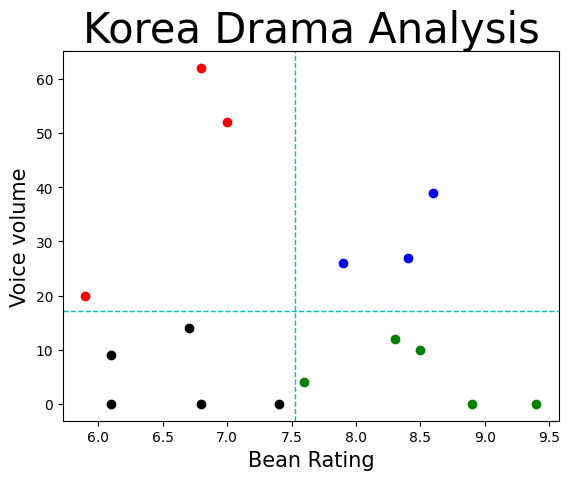

In [13]:
voice_list =[]
bean_list = []
axe_list = []

for i in range(len(bean)):
    
    if bean[i] > score_avg and mv_voice[i] > voice_avg: 
        color = 'blue' #若第i部影片大於豆瓣平均評價且大於影片平均聲量
        axe = '1_第一象限'
        
    elif bean[i] > score_avg and mv_voice[i] <= voice_avg: 
        color = 'green' #若第i部影片大於豆瓣平均評價且小於等於影片平均聲量
        axe = '4_第四象限'
        
    elif bean[i] <= score_avg and mv_voice[i] > voice_avg: 
        color = 'red' #若第i部影片小於等於豆瓣平均評價且大於影片平均聲量
        axe = '2_第二象限'
        
    else: #以上皆非
        
        color = 'black' 
        axe = '3_第三象限'
        
    plt.scatter(bean[i], mv_voice[i], color=color)
    
    voice_list.append(mv_voice[i])
    bean_list.append(bean[i])
    axe_list.append(axe)
    
    
plt.axhline(voice_avg, color='c', linestyle='dashed', linewidth=1) # 繪製x軸平均線 
plt.axvline(score_avg, color='c', linestyle='dashed', linewidth=1) # 繪製y軸平均線    

plt.title("Korea Drama Analysis",fontsize=30) #主標題
plt.xlabel("Bean Rating",fontsize=15) #x軸標籤名稱
plt.ylabel("Voice volume",fontsize=15) #y軸標籤名稱
plt.show()

In [14]:
#=====================================================================================================

voice_df = pd.DataFrame(voice_list, columns = ['聲量']) 
bean_df = pd.DataFrame(bean_list, columns = ['評分'] ) 
axe_df = pd.DataFrame(axe_list, columns = ['象限'] )     
final1 = pd.concat([voice_df,bean_df,axe_df], axis = 1) # axis=1指橫向合併，axis=0直向合併
final1['劇名'] = movie

final1 = final1.sort_values('象限')

final1.to_csv('評分與聲量圖.csv', 
              encoding = 'utf-8')

In [15]:
drama_cost = pd.read_csv('drama_cost.csv',
                         encoding = 'cp950'
                         )

avg_cost = drama_cost['cost'].mean()

fig = plt.figure(figsize=(15,10))
voice_list =[]
cost_list = []
axe_list = []

<Figure size 1500x1000 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


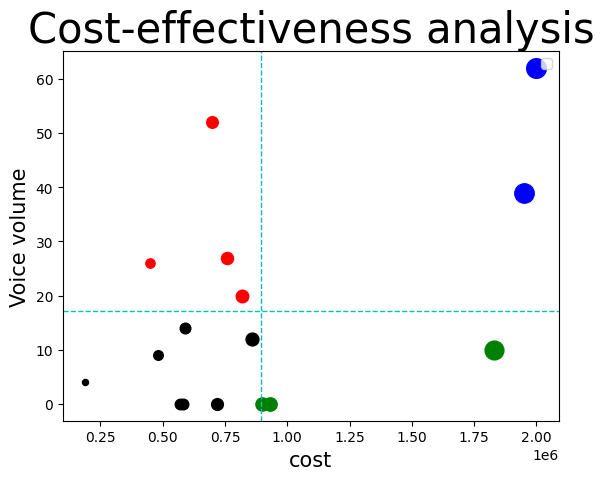

In [16]:
for i in range(len(drama_cost['cost'])):
    if drama_cost['cost'][i]>avg_cost and mv_voice[i] > voice_avg:#1_第一象限
        color = 'blue'
        axe = '1_第一象限'
        
    elif drama_cost['cost'][i]>avg_cost and mv_voice[i] <= voice_avg:#4_第四象限
        color = 'green'
        axe = '4_第四象限'
        
    elif drama_cost['cost'][i]<=avg_cost and mv_voice[i] > voice_avg:#3_第三象限
        color = 'red'
        axe = '2_第二象限'
        
    else:#2_第二象限
        color = 'black'
        axe = '3_第三象限'
        
    plt.scatter(drama_cost['cost'][i],mv_voice[i], color=color, s = drama_cost['cost'][i]/10000)
    # s為標記點大小
    
    voice_list.append(mv_voice[i])
    cost_list.append(drama_cost['cost'][i])
    axe_list.append(axe)
    
    
plt.axhline(voice_avg, color='c', linestyle='dashed', linewidth=1) # 繪製x軸平均線 
plt.axvline(avg_cost, color='c', linestyle='dashed', linewidth=1) # 繪製y軸平均線    

plt.title("Cost-effectiveness analysis",fontsize=30) #主標題
plt.xlabel("cost",fontsize=15) #x軸標籤名稱
plt.ylabel("Voice volume",fontsize=15) #y軸標籤名稱
plt.legend()
plt.show()
fig.savefig('成本效益評估分析.jpg')

In [17]:
#=====================================================================================================

voice_df = pd.DataFrame(voice_list, columns = ['聲量']) 
cost_df = pd.DataFrame(cost_list, columns = ['成本'] ) 
axe_df = pd.DataFrame(axe_list, columns = ['象限'] )     
final1 = pd.concat([voice_df,cost_df,axe_df], axis = 1)
final1['劇名']  = movie

final1 = final1.sort_values('象限')

final1.to_csv('成本效益評估分析.csv', encoding = 'cp950')


In [23]:
import plotly.express as px

# 問題：
# x 為成本
# y 為聲量（關注程度）
# 以象限當做顏色點的區分
# size大小以成本區分
fig = px.scatter(final1,
                 x = '成本',
                 y = '聲量',
                 size = '成本',
                 color = '象限',
                 hover_data=['劇名'])



# 接下來，我們要將X軸與Y軸放入動態圖中！
# 我們會使用的是 update_layout
# 詳細解釋在ppt
fig.update_layout(
        
        title = '成本效益評估分析',
        shapes=[
        
        # 設定X軸
        dict({
            'type': 'line',
            'x0': avg_cost,
            'y0': 0,
            
            'x1': avg_cost,
            'y1': final1['聲量'].max(),
            'line': {
                'color': '#FF00FF',
                'width': 5
            }}),
    
        # 設定Y軸
        dict({
            'type': 'line',
            'x0': 0,
            'y0': voice_avg,
            
            'x1': final1['成本'].max(),
            'y1': voice_avg,
            'line': {
                'color': '#FF00FF',
                'width': 5
            }})
    
    ])